# Euclidean distance

Euclidean distance: 5.0


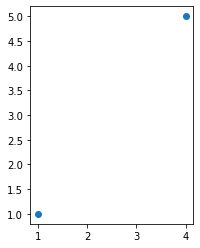

In [52]:
import geopandas as gpd
from shapely.geometry import Point

def euclidean_distance(point1, point2):
    gdf = gpd.GeoDataFrame(geometry=[Point(point1), Point(point2)])
    gdf.plot()
    return gdf.distance(gdf.shift())[1]

point1 = (1, 1)
point2 = (4, 5)
print("Euclidean distance:", euclidean_distance(point1, point2))


# Manhattan distance


In [ ]:

def manhattan_distance(point1, point2):
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

point1 = (1, 1)
point2 = (4, 5)
print("Manhattan distance:", manhattan_distance(point1, point2))


# Network distance using OSMnx


In [1]:
import osmnx as ox # if you want to know more, check here https://github.com/gboeing/osmnx-examples
import networkx as nx


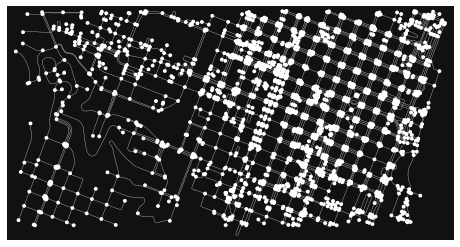

Network distance: 1279.8800000000003


In [3]:
def network_distance(point1, point2):
    G = ox.graph_from_bbox(45.51, 45.52, -122.70, -122.67, network_type='walk')
    nearest_node1 = ox.distance.nearest_nodes(G, X=[point1[0]], Y=[point1[1]])
    nearest_node2 = ox.distance.nearest_nodes(G, X=[point2[0]], Y=[point2[1]])
    fig, ax = ox.plot_graph(G, edge_linewidth=0.3)
    return nx.shortest_path_length(G, nearest_node1[0], nearest_node2[0], weight='length')

point1 = (-122.675, 45.515)
point2 = (-122.686, 45.511)
print("Network distance:", network_distance(point1, point2))


# Practice

In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

#
 This data originally from https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do

서울 안에서 이동하거나 서울 외부에서 서울로 오고 간 이동으로 통근, 통학, 쇼핑, 여가 등 행정수요를 유발하는 모든 이동 

"All movements that generate administrative demand, such as commuting, attending school, shopping, and leisure activities, either within Seoul or from outside Seoul to Seoul."

This phrase describes various types of mobility within and into Seoul that create different types of administrative demands for city management and resources.

 I Preprocessed for you

In [2]:
od_adm=pd.read_csv('https://raw.githubusercontent.com/XUAN-24601/Korea_Spatial/main/od_3years.csv')
od_adm['ADM_CD_D']=od_adm['ADM_CD_D'].astype('str')
od_adm['ADM_CD_O']=od_adm['ADM_CD_O'].astype('str')

In [3]:
od_adm.head()

,Unnamed: 0,time,ADM_CD_O,ADM_CD_D,type,flux,year
0,29,202001,21000,1101061,HW,50.62,2020
1,68,202001,21000,1102054,HW,54.84,2020
2,75,202001,21000,1102055,HW,59.04,2020
3,910,202001,21000,1119054,HW,95.09,2020
4,1458,202001,22000,1101061,HW,97.46,2020


In [4]:
od=pd.read_pickle('https://raw.githubusercontent.com/XUAN-24601/Korea_Spatial/main/OD/adm_od_5179.csv')
od


Line_OD  \
ADM_CD_O ADM_CD_D                                                      
1101053  1101053   LINESTRING (953232.431 1952855.901, 953232.431...   
         1101054   LINESTRING (953232.431 1952855.901, 954197.486...   
         1101055   LINESTRING (953232.431 1952855.901, 952643.877...   
         1101056   LINESTRING (953232.431 1952855.901, 953060.074...   
         1101057   LINESTRING (953232.431 1952855.901, 952193.444...   
...                                                              ...   
1125074  1125070   LINESTRING (968723.462 1948989.213, 968226.306...   
         1125071   LINESTRING (968723.462 1948989.213, 968832.787...   
         1125072   LINESTRING (968723.462 1948989.213, 967724.156...   
         1125073   LINESTRING (968723.462 1948989.213, 966609.275...   
         1125074   LINESTRING (968723.462 1948989.213, 968723.462...   

                      Distance  
ADM_CD_O ADM_CD_D               
1101053  1101053      0.000000  
         1101054   1869.032801  
         1101055   2629.471281  
         1101056   4641.212962  
         1101057   1100.601941  
...                        ...  
1125074  1125070   1909.128274  
         1125071    937.387800  
         1125072   1681.270352  
         1125073   2196.575708  
         1125074      0.000000  

[179776 rows x 2 columns]

## OD mapping

In [5]:
ef_with_od=od_adm.set_index(['ADM_CD_O','ADM_CD_D']).merge(od,left_index=True,right_index=True)
ef_with_od

Unnamed: 0    time type      flux  year  \
ADM_CD_O ADM_CD_D                                            
1101053  1101053        21849  202001   HW   3991.44  2020   
         1101053      1638810  202101   HW   2687.66  2021   
         1101053      3027468  202201   HW   2821.51  2022   
         1101054        21857  202001   HW    467.05  2020   
         1101054      1638818  202101   HW    250.86  2021   
...                       ...     ...  ...       ...   ...   
1125074  1125073      2597346  202101   HW   4763.01  2021   
         1125073      4061835  202201   HW   3672.39  2022   
         1125074      1137381  202001   HW  12990.83  2020   
         1125074      2597355  202101   HW   9338.51  2021   
         1125074      4061844  202201   HW  15508.43  2022   

                                                             Line_OD  \
ADM_CD_O ADM_CD_D                                                      
1101053  1101053   LINESTRING (953232.431 1952855.901, 953232.431...   
         1101053   LINESTRING (953232.431 1952855.901, 953232.431...   
         1101053   LINESTRING (953232.431 1952855.901, 953232.431...   
         1101054   LINESTRING (953232.431 1952855.901, 954197.486...   
         1101054   LINESTRING (953232.431 1952855.901, 954197.486...   
...                                                              ...   
1125074  1125073   LINESTRING (968723.462 1948989.213, 966609.275...   
         1125073   LINESTRING (968723.462 1948989.213, 966609.275...   
         1125074   LINESTRING (968723.462 1948989.213, 968723.462...   
         1125074   LINESTRING (968723.462 1948989.213, 968723.462...   
         1125074   LINESTRING (968723.462 1948989.213, 968723.462...   

                      Distance  
ADM_CD_O ADM_CD_D               
1101053  1101053      0.000000  
         1101053      0.000000  
         1101053      0.000000  
         1101054   1869.032801  
         1101054   1869.032801  
...                        ...  
1125074  1125073   2196.575708  
         1125073   2196.575708  
         1125074      0.000000  
         1125074      0.000000  
         1125074      0.000000  

[237974 rows x 7 columns]

<AxesSubplot:>

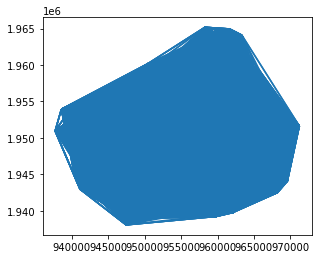

In [6]:
ef_with_od=gpd.GeoDataFrame(ef_with_od,geometry='Line_OD')
ef_with_od.plot()
# such a terrible visiualization ha~

OD visualization trick 1: let's change linewidth

<AxesSubplot:>

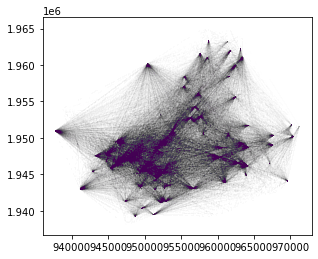

In [40]:

ef_with_od.plot('flux',linewidth=0.0003)


Looks cool ha ~



<AxesSubplot:>

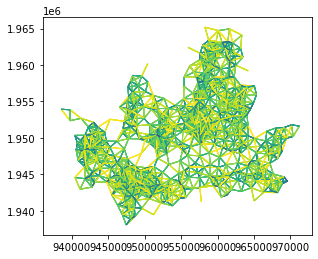

In [44]:
## Let plot Proximity network
ef_with_od.loc[ef_with_od['Distance']<2000].plot('Distance',linewidth=1)

In [21]:
import contextily
import matplotlib.pyplot as plt
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

## Add basemap

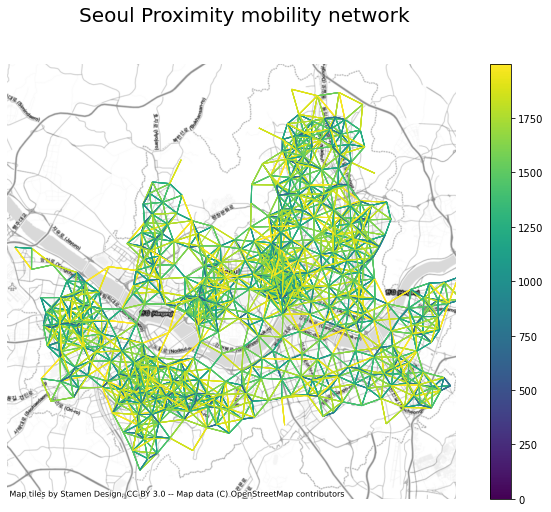

In [50]:
fig, axs = plt.subplots(figsize=(12,8))

ef_with_od.loc[ef_with_od['Distance']<2000].plot('Distance',linewidth=1,ax=axs,legend=True)

axs.set_xlim(938000, 970000)
axs.set_ylim(1936000, 1967000)

# Add basemap
contextily.add_basemap(axs, crs=ef_with_od.crs, source=contextily.providers.Stamen.TonerLite)

# Remove axes
axs.set_axis_off()

# Set the title for the entire figure
fig.suptitle('Seoul Proximity mobility network', fontsize=20)
fig.show()

What can you say from this plot about Seoul mobility network?

What if we want to see the network in 2020,2021,and 2022 spreately?
Easy
We will do it Next Week